In [15]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Clean and import 25 Portfolios dataset
ports = pd.read_csv('25_Portfolios_5x5.csv', header=15, skipfooter=7508, engine='python') #Manually added DATES to cell A16 to prevent a tokenization error
#header at 15 due to indexing, skipping massive footer bc/ of other data sets
ports = ports.dropna() #inplace=TRUE?
ports['year'] = ports.DATES.str[0:4]
ports['month'] = ports.DATES.str[4:6]

month_mapping = {
    '01': 'Jan',
    '02': 'Feb',
    '03': 'Mar',
    '04': 'Apr',
    '05': 'May',
    '06': 'Jun',
    '07': 'Jul',
    '08': 'Aug',
    '09': 'Sep',
    '10': 'Oct',
    '11': 'Nov',
    '12': 'Dec'
}

#print(type(ports['month']))
ports['month'] = ports['month'].map(month_mapping) #convert to month names...is this even needed anymore? current version should work without

ports['date'] = pd.to_datetime(ports['year'] + ports['month'], format='%Y%b')
ports.drop(['year', 'month', 'DATES'], axis=1, inplace=True)

cols = ports.columns.tolist()
cols.insert(0, cols.pop(cols.index('date')))
ports = ports.reindex(columns=cols)

ports = ports[~(ports['date'] < '1932-01-01')] #rename to fil_ports if you want to keep the data
ports = ports.set_index('date')

#ports.head()

ports_col = ports.columns.tolist()
#ports_col.remove('date')
#ports_col
#print(ports.dtypes)

for col_name in ports_col:
    ports[col_name] = pd.to_numeric(ports[col_name])

#print(ports.dtypes)
ports = ports/100
ports

,SMALL LoBM,ME1 BM2,ME1 BM3,ME1 BM4,SMALL HiBM,ME2 BM1,ME2 BM2,ME2 BM3,ME2 BM4,ME2 BM5,...,ME4 BM1,ME4 BM2,ME4 BM3,ME4 BM4,ME4 BM5,BIG LoBM,ME5 BM2,ME5 BM3,ME5 BM4,BIG HiBM
date,,,,,,,,,,,,,,,,,,,,,
1932-01-01,0.055527,-0.059907,0.083063,0.142165,0.060887,-0.003044,-0.013482,0.054795,0.143969,0.183762,...,-0.034174,-0.003956,-0.005579,0.038507,0.019409,-0.036929,-0.015137,0.025942,0.109191,0.078947
1932-02-01,-0.127896,-0.000154,0.058810,-0.019977,0.034665,-0.054119,0.032908,-0.023221,-0.045816,-0.011353,...,0.033679,0.052088,-0.013997,0.012611,0.037601,0.072592,0.056243,0.033144,-0.033170,0.146341
1932-03-01,-0.230216,-0.039056,-0.032485,-0.115349,-0.118922,-0.048922,-0.141355,-0.114193,-0.043036,-0.132422,...,-0.105899,-0.109531,-0.113353,-0.123945,-0.101478,-0.109710,-0.104864,-0.137685,-0.232023,0.021277
1932-04-01,-0.407620,-0.168293,-0.258159,-0.194433,-0.180051,-0.199193,-0.081414,-0.144050,-0.174530,-0.143736,...,-0.150637,-0.156276,-0.174525,-0.142341,-0.152035,-0.181767,-0.207489,-0.187549,-0.221641,-0.229167
1932-05-01,-0.128641,-0.352372,-0.058922,-0.051067,-0.102889,-0.119878,-0.217501,-0.220395,-0.173451,-0.204772,...,-0.205669,-0.201651,-0.181172,-0.185790,-0.279405,-0.204176,-0.169797,-0.311270,-0.367136,-0.108108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-01,-0.105582,-0.063277,-0.069582,-0.072085,-0.097850,-0.031187,-0.032047,-0.036095,-0.050314,-0.103626,...,0.012537,-0.003649,-0.020602,-0.038174,-0.122167,0.082193,0.031089,0.010049,-0.037718,-0.066381
2023-04-01,0.025665,-0.020373,-0.015645,-0.027308,-0.041658,-0.029281,0.002565,-0.032172,-0.029245,-0.029102,...,-0.018991,-0.022191,-0.003701,-0.016289,0.002381,0.011619,0.013346,0.011861,0.023682,0.036036
2023-05-01,0.047931,0.025041,0.032337,-0.011028,-0.018267,0.011439,0.034223,0.020769,0.019823,-0.049410,...,0.001583,-0.023246,-0.039899,-0.031398,-0.064185,0.055713,-0.012059,-0.050786,-0.072895,-0.046959


In [3]:
#Clean and import FF Factors dataset
factors = pd.read_csv('F-F_Research_Data_Factors.csv', header=3, skipfooter=98, engine='python') #Manually added DATES to cell A4 to prevent a tokenization error
#header at 3 due to indexing, skipfooter to avoid the annual data at the bottom of the dataset. Engine specified to avoid warning
factors = factors.dropna() #inplace=TRUE?
factors['year'] = factors.DATES.str[0:4]
factors['month'] = factors.DATES.str[4:6]

month_mapping = {
    '01': 'Jan',
    '02': 'Feb',
    '03': 'Mar',
    '04': 'Apr',
    '05': 'May',
    '06': 'Jun',
    '07': 'Jul',
    '08': 'Aug',
    '09': 'Sep',
    '10': 'Oct',
    '11': 'Nov',
    '12': 'Dec'
}

#print(type(factors['month']))
factors['month'] = factors['month'].map(month_mapping) #convert to month names...is this even needed anymore? current version should work without

factors['date2'] = pd.to_datetime(factors['year'] + factors['month'], format='%Y%b')
factors.drop(['year', 'month', 'DATES'], axis=1, inplace=True)

cols = factors.columns.tolist()
cols.insert(0, cols.pop(cols.index('date2')))
factors = factors.reindex(columns=cols)

factors = factors[~(factors['date2'] < '1932-01-01')] #rename to fil_ports if you want to keep the data
factors = factors.set_index('date2')

#factors.head()

factors_col = factors.columns.tolist()
#factors_col.remove('date')
#factors_col
#print(factors.dtypes)

for col_name in factors_col:
    factors[col_name] = pd.to_numeric(factors[col_name])

#print(factors.dtypes)
factors = factors/100

factors

,Mkt-RF,SMB,HML,RF
date2,,,,
1932-01-01,-0.0158,0.0393,0.0903,0.0023
1932-02-01,0.0546,-0.0278,-0.0146,0.0023
1932-03-01,-0.1121,0.0227,-0.0232,0.0016
1932-04-01,-0.1796,0.0145,0.0143,0.0011
1932-05-01,-0.2051,0.0391,-0.0298,0.0006
...,...,...,...,...
2023-03-01,0.0251,-0.0551,-0.0885,0.0036
2023-04-01,0.0061,-0.0335,-0.0004,0.0035
2023-05-01,0.0035,0.0161,-0.0772,0.0036


In [4]:
#Cleaning up the data for later use

ports = ports.sub(factors['RF'], axis=0) #calculating excess returns
#ports

replace_terms = ['SMALL', 'BIG', 'HiBM', 'LoBM']

terms_mapping = {
    'SMALL': 'ME1',
    'BIG': 'ME5',
    'LoBM': 'BM1',
    'HiBM': 'BM5'
}

#ports['month'] = ports['month'].map(month_mapping)
#Iterate through the columns and replace the specified part
for i in range(2):
    for column in ports.columns:
        for term in replace_terms:
            if term in column:
                new_col = column.replace(term, terms_mapping[term])
                ports.rename(columns={column: new_col}, inplace=True)
        
#print(ports)

In [5]:
#Question 1a
#This assumes that the data is ordered appropriately - per our data and code here, it is.
def mean_ret_calc(ports_data):
    mean_ret = ports_data.mean()
    ret_matrix = mean_ret.values.reshape(5, 5)
    ports_means = pd.DataFrame(ret_matrix, index=['ME1', 'ME2', 'ME3', 'ME4', 'ME5'], 
                      columns=['BM1', 'BM2', 'BM3', 'BM4', 'BM5'])
    return ports_means

print(mean_ret_calc(ports))

          BM1       BM2       BM3       BM4       BM5
ME1  0.007651  0.009074  0.011790  0.013214  0.015009
ME2  0.007874  0.010656  0.010912  0.011988  0.013725
ME3  0.008375  0.010018  0.010116  0.011430  0.012372
ME4  0.008091  0.008775  0.009754  0.010758  0.011539
ME5  0.007214  0.006909  0.008237  0.007716  0.010494


In [6]:
#Question 1b&c
#Run OLS time-series regressions to find parameter estimates of

model_betas = pd.DataFrame(columns = ['row', 'alpha', 'b_mkt', 'b_smb', 'b_hml'])
model_errors = pd.DataFrame(columns = ['row', 'se_alpha', 'se_mkt', 'se_smb', 'se_hml'])

ports_titles = ports.columns
factors_titles = ['Mkt-RF','SMB','HML'] #be careful with Mkt-RF - the RF HAS to be capitalized lol

for title in ports_titles:
    Y = ports[title]
    X = factors[factors_titles]
    X = sm.add_constant(X)
    model = sm.OLS(Y, X, missing='drop') #check these errors! wasn't sure if skipping was appropriate
    output = model.fit()
    model_betas = model_betas.append(pd.Series([title, output.params[0],output.params[1],output.params[2],output.params[3]], index = model_betas.columns), ignore_index = True)
    model_errors = model_errors.append(pd.Series([title, output.bse[0],output.bse[1],output.bse[2],output.bse[3]], index=model_errors.columns), ignore_index = True)
#I couldn't figure out a prettier way to call the output without calling [0,3] individually. Invalid input somehow?

print(model_betas)
print(model_errors)

        row     alpha     b_mkt     b_smb     b_hml
0   ME1 BM1 -0.006764  1.246109  1.526323  0.374275
1   ME1 BM2 -0.003373  1.071860  1.539754  0.194695
2   ME1 BM3 -0.001263  1.082321  1.213975  0.531696
3   ME1 BM4  0.001187  0.914958  1.240868  0.573779
4   ME1 BM5  0.001207  0.957962  1.322465  0.899343
5   ME2 BM1 -0.002198  1.098868  1.146469 -0.229315
6   ME2 BM2  0.000097  1.031942  0.986545  0.124743
7   ME2 BM3  0.000101  0.999287  0.809039  0.362205
8   ME2 BM4  0.000565  0.973673  0.805608  0.572083
9   ME2 BM5  0.000144  1.068700  0.912584  0.880009
10  ME3 BM1 -0.001230  1.142764  0.813569 -0.230141
11  ME3 BM2  0.001008  1.011303  0.546318  0.035233
12  ME3 BM3  0.000317  1.002453  0.431497  0.326888
13  ME3 BM4  0.000588  1.009228  0.462409  0.564329
14  ME3 BM5 -0.000633  1.106569  0.594902  0.853663
15  ME4 BM1  0.000639  1.064441  0.336790 -0.341327
16  ME4 BM2  0.000028  1.042208  0.210141  0.114248
17  ME4 BM3  0.000305  1.018209  0.207084  0.344075
18  ME4 BM4 

C:\Users\gurka\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [7]:
#1b&c Estimate lambdas

model_lambdas = pd.DataFrame(columns = ['row', 'lambda', 'se_lambda'])

for title in factors_titles:
    m_lambda = factors[title].mean()
    se_lambda = factors[title].std()/np.sqrt(1)
    model_lambdas = model_lambdas.append(pd.Series([title, m_lambda, se_lambda], index = model_lambdas.columns), ignore_index = True)

model_lambdas

,row,lambda,se_lambda
0,Mkt-RF,0.007488,0.051560
1,SMB,0.002382,0.031811
2,HML,0.003869,0.035801


In [8]:
#1d


In [9]:
#1e with constant

#cons_ols_titles = pd.DataFrame(['b_mkt', 'b_smb', 'b_hml'])
#factor_betas = model_betas['Mkt-RF','SMB','HML']

Y = ports.mean() #estimating expected value of return
X = model_betas[['b_mkt', 'b_smb', 'b_hml']]
X = sm.add_constant(X)
X = np.array(X, dtype=float)
model = sm.OLS(Y, X, missing = 'drop')
output = model.fit()
print(output.params)

est_model_ret = X @ output.params #dot product to generate estimated/predicted model returns
alpha = Y - est_model_ret

#Root mean square pricing error
rmspe = np.sqrt(np.sum(alpha**2))/len(alpha)
#Mean absolute pricing error
mape = np.sum(np.abs(alpha))/len(alpha)

#Calculate the R^2
#Prof note from assignment on R^2 - apparently there are multiple?
#R2_1 = var(beta*lambda)/var(Ere);
#R2_2 = 1 - var(alpha, 1)/var(mean(rx),1)
#R2_3 calculation must be similar to R2_2
R2_1 = est_model_ret.var()/Y.var()
R2_2 = 1 - alpha.var()/Y.var()
R2_3 = 1 - alpha.var()/Y.var() #this can't be right, it's the same number. Think about this one!

cs_c_lambdas = pd.DataFrame(columns = ['l_c', 'l_mkt', 'l_smb', 'l_hml'])
cs_c_se = pd.DataFrame(columns = ['se_c', 'se_mkt', 'se_smb', 'se_hml']) #prof said just use standard errors
cs_c_parameters = pd.DataFrame(columns = ['RMS Pricing Error', 'MA Pricing Error', 'R^2_1', 'R^2_2', 'R^2_3'])
#Cross-sectional constant output. Is there a way to make a neater chart?

cs_c_lambdas = cs_c_lambdas.append(pd.Series([output.params[0],output.params[1],output.params[2],output.params[3]], index = cs_c_lambdas.columns), ignore_index = True)
cs_c_se = cs_c_se.append(pd.Series([output.bse[0],output.bse[1],output.bse[2],output.bse[3]], index = cs_c_se.columns), ignore_index = True)
cs_c_parameters = cs_c_parameters.append(pd.Series([rmspe, mape, R2_1, R2_2, R2_3], index = cs_c_parameters.columns), ignore_index = True)

print(cs_c_lambdas)
print(cs_c_se)
print(cs_c_parameters)

#how do I get rid of the 0s at the start of every dataframe?


const    0.017913
x1      -0.009721
x2       0.001655
x3       0.003977
dtype: float64
        l_c     l_mkt     l_smb     l_hml
0  0.017913 -0.009721  0.001655  0.003977
       se_c    se_mkt    se_smb    se_hml
0  0.003045  0.002929  0.000405  0.000566
   RMS Pricing Error  MA Pricing Error     R^2_1     R^2_2     R^2_3
0             0.0002          0.000761  0.745898  0.776977  0.776977


C:\Users\gurka\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [10]:
#1e without constant

Y = ports.mean() #estimating expected value of return
X = model_betas[['b_mkt', 'b_smb', 'b_hml']]
X = np.array(X, dtype=float)

#the logic here kinda confuses me still. Did I add the test assets correctly/on the right side?
Y = Y.append(factors[['Mkt-RF','SMB','HML']].mean())

#temp_mean = factors[['Mkt-RF', 'SMB', 'HML']].mean()
#X = np.vstack([X, temp_mean.values])

#expand_x = pd.DataFrame([factors[['Mkt-RF', 'SMB', 'HML']]], columns=['Mkt-RF', 'SMB', 'HML'])
#X = pd.concat([X, expand_x.mean()], axis=0, ignore_index=True)

X = np.concatenate((X, np.identity(3)), axis=0)
#there was a sizing error with the X matrix, this is a workaround

model = sm.OLS(Y, X, missing = 'drop')
output_nc = model.fit()
print(output_nc.params)

est_model_ret_nc = X @ output_nc.params #dot product to generate estimated/predicted model returns
alpha_nc = Y - est_model_ret_nc

#Root mean square pricing error
rmspe_nc = np.sqrt(np.sum(alpha_nc**2))/len(alpha_nc)
#Mean absolute pricing error
mape_nc = np.sum(np.abs(alpha_nc))/len(alpha_nc)

#Calculate the R^2
#Prof note from assignment on R^2 - apparently there are multiple?
#R2_1 = var(beta*lambda)/var(Ere);
#R2_2 = 1 - var(alpha, 1)/var(mean(rx),1)
#R2_3 calculation must be similar to R2_2
R2_1_nc = est_model_ret_nc.var()/Y.var()
R2_2_nc = 1 - alpha_nc.var()/Y.var()
R2_3_nc = 1 - (alpha**2).mean()/Y.var() #Not 100% confident in these given the 1/n vs 1/(n-1) differential per the homework guide

cs_c_lambdas_nc = pd.DataFrame(columns = ['l_mkt_nc', 'l_smb_nc', 'l_hml_nc'])
cs_c_se_nc = pd.DataFrame(columns = ['se_mkt_nc', 'se_smb_nc', 'se_hml_nc']) #prof said just use standard errors
cs_c_parameters_nc = pd.DataFrame(columns = ['RMS Pricing Error_nc', 'MA Pricing Error_nc', 'R^2_1_nc', 'R^2_2_nc', 'R^2_3_nc'])
#Cross-sectional constant output. Is there a way to make a neater chart?

cs_c_lambdas_nc = cs_c_lambdas_nc.append(pd.Series([output_nc.params[0],output_nc.params[1],output_nc.params[2]], index = cs_c_lambdas_nc.columns), ignore_index = True)
cs_c_se_nc = cs_c_se_nc.append(pd.Series([output_nc.bse[0],output_nc.bse[1],output_nc.bse[2]], index = cs_c_se_nc.columns), ignore_index = True)
cs_c_parameters_nc = cs_c_parameters_nc.append(pd.Series([rmspe_nc, mape_nc, R2_1_nc, R2_2_nc, R2_3_nc], index = cs_c_parameters_nc.columns), ignore_index = True)

print(cs_c_lambdas_nc)
print(cs_c_se_nc)
print(cs_c_parameters_nc)

#how do I get rid of the 0s at the start of every dataframe?

x1    0.007337
x2    0.001569
x3    0.003925
dtype: float64
   l_mkt_nc  l_smb_nc  l_hml_nc
0  0.007337  0.001569  0.003925
   se_mkt_nc  se_smb_nc  se_hml_nc
0    0.00049   0.000559   0.000746
   RMS Pricing Error_nc  MA Pricing Error_nc  R^2_1_nc  R^2_2_nc  R^2_3_nc
0              0.000293              0.00113  0.924257  0.680725  0.870599


In [11]:
#1e final

#this section is built off of the covariance matrix math formulas guided by the professor in the homework
#convert the dataframes into matrices for transposing/calculations, etc.
beta_1e = np.asmatrix(model_betas[['b_mkt','b_smb','b_hml']]) #should this be .astype(float) ? - not sure if I need to specify
lambda_1e = np.asmatrix(cs_c_lambdas_nc[['l_mkt_nc', 'l_smb_nc', 'l_hml_nc']]) #no constant data. Also asfloat?
#need to do matrix math here to convert this into covariance for the f-formula
####Get this from 1d from the rest of the team


#f-var
p_val #for f-test

NameError: name 'p_val' is not defined

In [12]:
model_betas

,row,alpha,b_mkt,b_smb,b_hml
0,ME1 BM1,-0.006764,1.246109,1.526323,0.374275
1,ME1 BM2,-0.003373,1.071860,1.539754,0.194695
2,ME1 BM3,-0.001263,1.082321,1.213975,0.531696
3,ME1 BM4,0.001187,0.914958,1.240868,0.573779
4,ME1 BM5,0.001207,0.957962,1.322465,0.899343
5,ME2 BM1,-0.002198,1.098868,1.146469,-0.229315
6,ME2 BM2,0.000097,1.031942,0.986545,0.124743
7,ME2 BM3,0.000101,0.999287,0.809039,0.362205
8,ME2 BM4,0.000565,0.973673,0.805608,0.572083
9,ME2 BM5,0.000144,1.068700,0.912584,0.880009


TypeError: 'RegressionResultsWrapper' object is not subscriptable

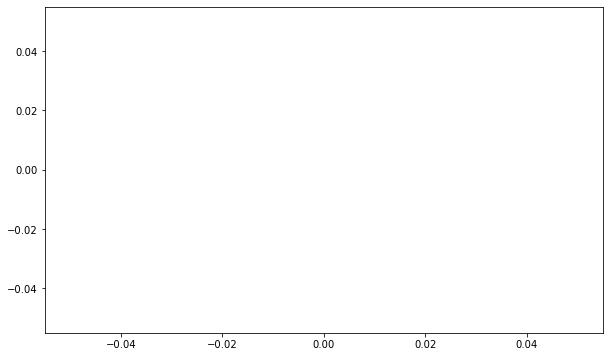

In [34]:
# Scatterplot of data points
plt.figure(figsize=(10, 6))
sns.scatterplot(x=model_betas['b_mkt'], y=ports.mean(), label='Data Points', color='blue')

# Add regression lines
sns.regplot(x=output['b_mkt'], y=ports.mean(), scatter=True, color='red', label='Regression Line (with constant)', ci=None)
sns.regplot(x=model_betas['b_mkt'], y=ports.mean(), scatter=True, color='green', label='Regression Line (without constant)', ci=None)

# Set labels and title
plt.xlabel('Beta (Market)')
plt.ylabel('Expected Returns')
plt.title('Scatterplot with Regression Lines')

# Add legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

KeyError: 'l_mkt'

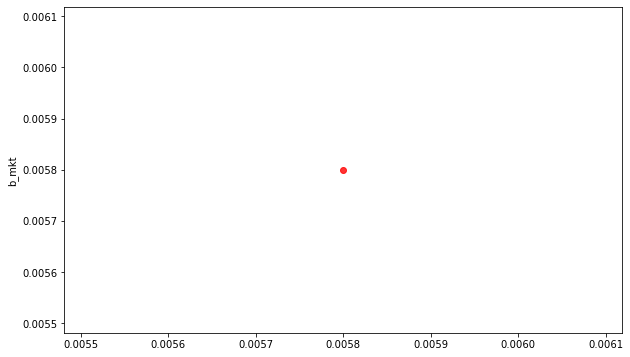

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already run the regressions and obtained output and output_nc

# Scatterplot of data points
plt.figure(figsize=(10, 6))
sns.scatterplot(x=model_betas['b_mkt'], y=ports.mean(), label='Data Points', color='blue')

# Add regression lines
sns.regplot(x=cs_c_lambdas['l_c'] + cs_c_lambdas['l_mkt']*model_betas['b_mkt'], y=output.params[0] + output.params[1]*model_betas['b_mkt'], scatter=True, color='red', label='Regression Line (with constant)', ci=None)
sns.regplot(x=cs_c_lambdas_nc['l_mkt'], y=output_nc.params[0]*model_betas['b_mkt'], scatter=True, color='green', label='Regression Line (without constant)', ci=None)

# Set labels and title
plt.xlabel('Beta (Market)')
plt.ylabel('Expected Returns')
plt.title('Scatterplot with Regression Lines')

# Add legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


In [ ]:
#1f
def get_plot(factor):
    axes = plt.gca()
    y = portfolios.mean()
    x = df_ts['beta ' + factor]
    plt.scatter(x, y, label='TS')
    for c in ff_factors.columns:
        if c.lower().startswith(factor.lower()):
            plt.scatter(1, ff_factors[c].mean(), label=factor+' E(r)')
    plt.ylim(0)
    plt.xlim(0)
    x_vals = np.array(axes.get_xlim())
    y_vals_1 = float(df_xs_e1['lambda 0']) + float(df_xs_e1['lambda ' + factor]) * x_vals
    y_vals_2 = float(df_xs_e2['lambda ' + factor]) * x_vals
    plt.plot(x_vals, y_vals_1, '-', label='CS, free const.')
    plt.plot(x_vals, y_vals_2, '-', label='CS, no const.')
    plt.xlabel('Beta')
    plt.ylabel('Avg. return')
    plt.title('Average return vs. Beta for ' + factor)
    plt.legend()
    plt.show()
    

# Scatterplot of data points
plt.figure(figsize=(10, 6))
sns.scatterplot(x=model_betas['b_mkt'], y=ports.mean(), label='Data Points', color='blue')

# Add regression lines
sns.regplot(x=model_betas['b_mkt'], y=ports.mean(), scatter=False, color='red', label='Regression Line (with constant)')
sns.regplot(x=model_betas['b_mkt'], y=ports.mean(), scatter=False, color='green', label='Regression Line (without constant)')

# Set labels and title
plt.xlabel('Beta (Market)')
plt.ylabel('Expected Returns')
plt.title('Scatterplot with Regression Lines')

# Add legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    axes = plt.gca()
    y = portfolios.mean()
    x = df_ts['beta ' + factor]
    plt.scatter(x, y, label='TS')
    for c in ff_factors.columns:
        if c.lower().startswith(factor.lower()):
            plt.scatter(1, ff_factors[c].mean(), label=factor+' E(r)')
    plt.ylim(0)
    plt.xlim(0)
    x_vals = np.array(axes.get_xlim())
    y_vals_1 = float(df_xs_e1['lambda 0']) + float(df_xs_e1['lambda ' + factor]) * x_vals
    y_vals_2 = float(df_xs_e2['lambda ' + factor]) * x_vals
    plt.plot(x_vals, y_vals_1, '-', label='CS, free const.')
    plt.plot(x_vals, y_vals_2, '-', label='CS, no const.')
    plt.xlabel('Beta')
    plt.ylabel('Avg. return')
    plt.title('Average return vs. Beta for ' + factor)
    plt.legend()
    plt.show()
